In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
DATASET_URL = "./bike.csv"
FEATURES = [
	"instant",
	"dteday",
	"season",
	"yr",
	"mnth",
	"hr",
	"holiday",
	"weekday",
	"workingday",
	"weathersit",
	"temp",
	"atemp",
	"hum",
	"windspeed",
	"casual",
	"registered"
]
LABEL = "cnt"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"instant": "int64",
	"dteday": "object",
	"season": "category",
	"yr": "category",
	"mnth": "category",
	"hr": "category",
	"holiday": "category",
	"weekday": "category",
	"workingday": "category",
	"weathersit": "category",
	"temp": "float32",
	"atemp": "float32",
	"hum": "float32",
	"windspeed": "float32",
	"casual": "float32",
	"registered": "float32",
	"cnt": "float32"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [3]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, skiprows=1)
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [4]:
# Drop columns
DROP_COLUMNS = ["instant", "dteday", "casual", "registered"]

for column in DROP_COLUMNS:
	data = data.drop(column, axis=1)
	FEATURES.remove(column)
	COLUMNS.remove(column)
	DTYPE.pop(column)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float32 
 9   atemp       17379 non-null  float32 
 10  hum         17379 non-null  float32 
 11  windspeed   17379 non-null  float32 
 12  cnt         17379 non-null  float32 
dtypes: category(8), float32(5)
memory usage: 476.9 KB


In [6]:
# Missing values
data = data.dropna()
data.isna().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [7]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,temp,atemp,hum,windspeed,cnt
count,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,17379.000000
mean,1.666777e-08,3.298937e-09,-1.376004e-09,1.317645e-08,189.463089
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,181.387604
min,-2.477205e+00,-2.768625e+00,-3.251166e+00,-1.553888e+00,1.000000
25%,-8.153035e-01,-8.290895e-01,-7.631432e-01,-6.996886e-01,40.000000
50%,1.564695e-02,5.251762e-02,1.436396e-02,3.189885e-02,142.000000
75%,8.465976e-01,8.462550e-01,7.918710e-01,5.198961e-01,281.000000
max,2.612367e+00,3.050563e+00,1.932215e+00,5.399870e+00,977.000000


In [8]:
# Normalise Label
min_max_scaler = preprocessing.MinMaxScaler()
data[[LABEL]] = min_max_scaler.fit_transform(data[[LABEL]])
# standard_scaler = preprocessing.StandardScaler()
# data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,temp,atemp,hum,windspeed,cnt
count,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,17379.000000
mean,1.666777e-08,3.298937e-09,-1.376004e-09,1.317645e-08,0.193097
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,0.185848
min,-2.477205e+00,-2.768625e+00,-3.251166e+00,-1.553888e+00,0.000000
25%,-8.153035e-01,-8.290895e-01,-7.631432e-01,-6.996886e-01,0.039959
50%,1.564695e-02,5.251762e-02,1.436396e-02,3.189885e-02,0.144467
75%,8.465976e-01,8.462550e-01,7.918710e-01,5.198961e-01,0.286885
max,2.612367e+00,3.050563e+00,1.932215e+00,5.399870e+00,1.000000


In [9]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(data[column].cat.categories.tolist())

[0, 1, 2, 3]
[0, 1]
[0, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3]
[0, 1, 12, 17, 18, 19, 20, 21, 22, 23, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16]
[0, 1]
[6, 0, 1, 2, 3, 4, 5]
[0, 1]
[0, 1, 2, 3]


In [10]:
data = data.astype(dtype=DTYPE)
data.dtypes

season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float32
atemp          float32
hum            float32
windspeed      float32
cnt            float32
dtype: object

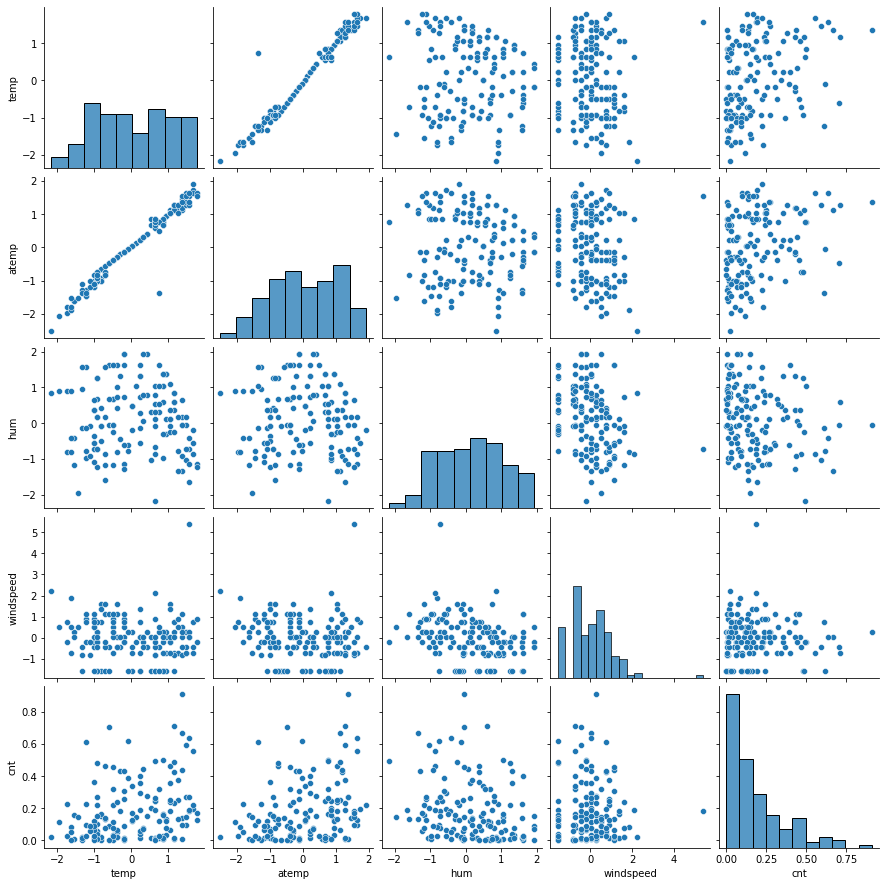

In [11]:
sns.pairplot(data.sample(n=150, random_state=1))

In [12]:
target = data.pop(LABEL)
target

0        0.015369
1        0.039959
2        0.031762
3        0.012295
4        0.000000
           ...   
17374    0.120902
17375    0.090164
17376    0.091189
17377    0.061475
17378    0.049180
Name: cnt, Length: 17379, dtype: float32

In [13]:
data = pd.get_dummies(data, dtype="float32")
data

,temp,atemp,hum,windspeed,season_0,season_1,season_2,season_3,yr_0,yr_1,...,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,workingday_1,weathersit_0,weathersit_1,weathersit_2,weathersit_3
0,-1.334648,-1.093281,0.947372,-1.553888,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.438516,-1.181732,0.895539,-1.553888,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.438516,-1.181732,0.895539,-1.553888,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.334648,-1.093281,0.636370,-1.553888,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.334648,-1.093281,0.636370,-1.553888,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-1.269602,-0.141137,-0.211691,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17375,-1.230779,-1.269602,-0.141137,-0.211691,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17376,-1.230779,-1.269602,-0.141137,-0.211691,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
17377,-1.230779,-1.181732,-0.348473,-0.456099,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [14]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)